In [7]:
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tqdm


In [8]:
DATADIR = r"C:\Users\tahas\OneDrive\Desktop\Pro\kagglecatsanddogs_3367a\PetImages"
CATA = ["Cat","Dog"]


for cata in CATA:
    path = os.path.join(DATADIR,cata) # Join two paths 
    for img in os.listdir(path): # to counting of imgs in the folder
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #convert the img into array.
        print(img_array)
        #plt.imshow(img_array,cmap = "gray") # 
        #plt.show()
        break
    break     

[[167 167 168 ... 204 203 202]
 [167 167 168 ... 204 203 203]
 [167 167 168 ... 205 204 203]
 ...
 [124 124 124 ...   2   2   2]
 [123 123 123 ...   1   1   1]
 [122 122 123 ...   1   1   1]]


#### We have manypicture of different sizes to we are norlimilizing every img in same size for better learning

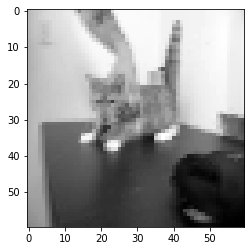

In [9]:
img_size = 60
neu=cv2.resize(img_array,(img_size , img_size))
plt.imshow(neu, cmap = "gray")
plt.show()

### FROM here preparing our training data set

In [10]:
training_data = []
def create_training_data():
    for cata in CATA:
        path = os.path.join(DATADIR,cata)  # create path to dogs and cats
        class_names = CATA.index(cata)    # get the classification  (0 or a 1). 0=dog 1=cat
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # Converting img into array
                neu_array=cv2.resize(img_array,(img_size , img_size))
                plt.imshow(neuarray,cmap='gray')
                training_data.append([neu_array,class_names])
            except Exception as e:
                pass
create_training_data()

In [15]:
print(len(training_data))

24946


#### shuffling the training data set for good learning

In [ ]:
import random
random.shuffle(training_data)

#### spliting of train and test data set.

In [ ]:
X =[]
y =[]

In [ ]:
import numpy as np
for features,label in training_data:
    X.append(features)
    y.append(label) 
# Here in below line in reshape the first "-1" catch first column of X then rehape it a/c to img_size you have given,
# and than the third aurgument 1 its because we dealing with gray scale img.
X.shape
X = np.array(X).reshape(-1,img_size,img_size,1) 
y = np.array(y)

#### Saving the model

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()